# Logistic Regression and Gradient Descent Lecture Code

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd

<p><a name="classification"></a></p>
## Classification Problems

- Categorical (qualitative) variables: takes values in a finite set (usually unordered).

  - email: {spam, non-spam}
  - blood type: {A, B, AB, O}
  - tumor: {malignant, benign}

- Classification: given a feature (or a set of features), we want to predict categorical outputs.

- Sometime people are also interested in estimating the probabilities that X belongs to each category.


**A Classification Example**

- We want to predict whether a tumor is maligant or benign based on the size

- The output is binary: 
  - 0: benign
  - 1: malignant

- Here is a simulated data set:

In [2]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            """
Load tumor dataset
"""
from __future__ import print_function
import pandas as pd
# give the path to the file 
path_to_file = "./data/tumor.csv"
data = pd.read_csv(path_to_file)
print(data.shape)
data.head()

(12, 2)


,Size,Malignant
0,3.788628,0
1,2.436510,0
2,2.096497,0
3,0.136507,0
4,1.722612,0


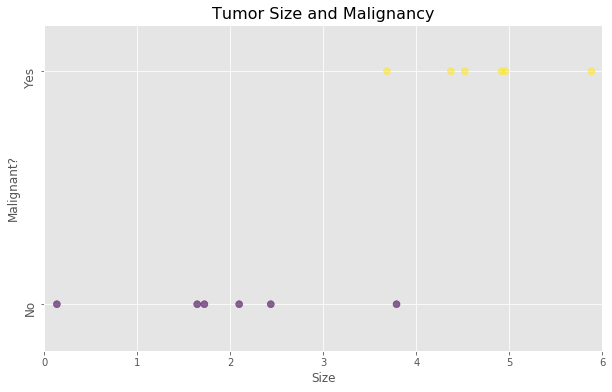

In [3]:
"""
Visualization the tumor dataset
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


## function to make a 1d plot
def data_1Dplot(x, y, xlabel=None, ylabel=None, labels=None, title=None):
    ## scatter plot the data
    plt.scatter(x, y, c=y, s=50, alpha=0.6)
    ## set labels
    if not xlabel is None:
        plt.xlabel(xlabel, size=12)
    if not ylabel is None:
        plt.ylabel(ylabel, size=12)
    ## set ticks for y
    y_ticks = np.unique(y)
    if not labels is None:
        plt.yticks(y_ticks, labels, \
                   rotation='vertical', size=12)
    ## set title
    if not title is None:
        plt.title(title, size=16)
        
## feature x_tm and output x_tm
x_tm = data[["Size"]]
y_tm = data["Malignant"]
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm.values.flatten(), y_tm, \
            xlabel="Size", ylabel="Malignant?", \
            labels=["No", "Yes"], \
            title="Tumor Size and Malignancy")
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

Question: Can we use simple linear regression?

**Can we use Linear Regression?**

- Let's fit a linear regression model with the simulated tumor data and visualize your fitted line with the data points.

In [4]:
"""
Fit a linear model.
"""
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="matplotlib", message="No contour levels")
from sklearn import linear_model
lm_1 = linear_model.LinearRegression()
## Fit a linear model
lm_1.fit(x_tm, y_tm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

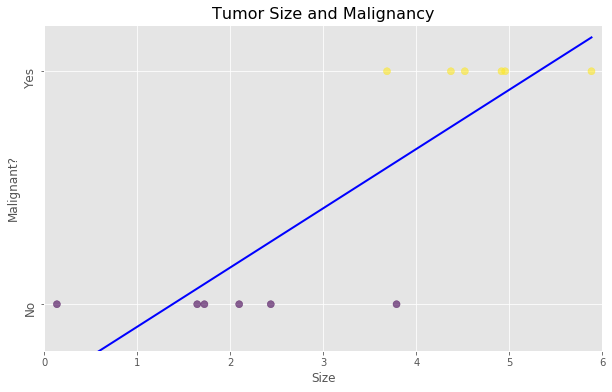

In [5]:
"""
Plot the fitted line.
"""
def linear_model_1Dplot(x, model, threshold=False, c="b"):
    ## set x range
    x = np.array(x)
    num = 10000
    x = np.linspace(start=min(x), stop=max(x), num=num).reshape(num, 1)
    ## plot regression line
    ## plot prediction if threshold is given
    if threshold:
        plt.plot(x, \
         [0 if i < threshold else 1 for i in model.predict(x)],
         lw=2, c=c)
        plt.plot(x, model.predict(x), lw=2, c=c, ls='--')
    else:
        plt.plot(x, model.predict(x), lw=2, c=c)
        
## Plot the data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm.values.flatten(), y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot the linear model
linear_model_1Dplot(x_tm.values.flatten(), lm_1)
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

- We may then set a threshold:
  - Predict 1 if $\hat{y}\ge0.5$.
  - Predict 0 if $\hat{y}<0.5$.
- The predicted values become binary:

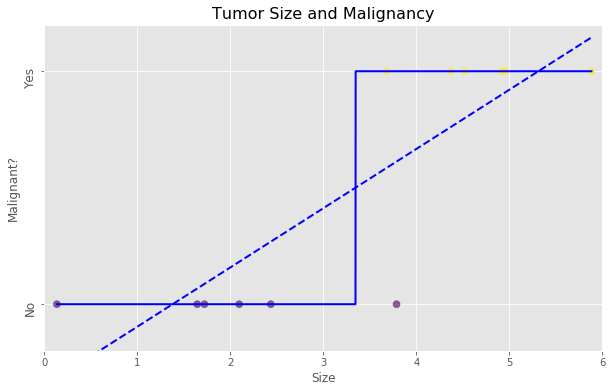

In [6]:
"""
Set prediction threshold.
"""
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm.values.flatten(), y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot the linear model with prediction line
linear_model_1Dplot(x_tm.values.flatten(), lm_1, threshold=.5)
## Set plot range
plt.axis([0,6, -.2, 1.2])
plt.show()

**Issues with Linear Regression:**

- At first sight it looks like the result of the binary prediction with linear regression is not so bad. However, we do have the following two problems:

 - the continuous output exceeds the interval [0, 1]. Therefore we cannot interpret it as probability.
 - the prediction can be affected by outliers easily. 

We illustrate how the outliers - data points which are distant from the trend followed by the other observations - affect the model.

- We add two outliers to the original data set to form a new data set $x\_tm2$.

- Fit another linear regression model lm_2 (do not overwrite the previous one) with the simulated tumor data.

In [7]:
## Make a copy of the data set and add two outliers
x_tm2 = np.copy(x_tm)
x_tm2[-3, 0] = 13
x_tm2[-1, 0] = 14
## Fit a new linear model
lm_2 = linear_model.LinearRegression()
lm_2.fit(x_tm2, y_tm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- Visualize the two linear models, lm_1 and lm_2 on the same graph.

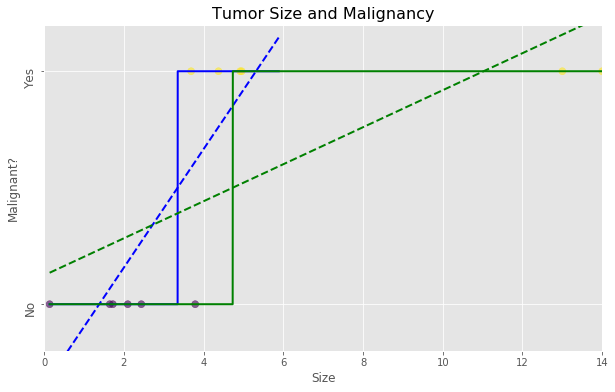

In [8]:
## Plot data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm2, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot original linear model
linear_model_1Dplot(x_tm, lm_1, threshold=.5)
## Plot new linear model
linear_model_1Dplot(x_tm2, lm_2, threshold=.5, c='g')
## Set plot range
plt.axis([0,14,-.2,1.2])
plt.show()

<p><a name="logistic"></a></p>
## Logistic Regression

Logistic regression remedies the issues listed in the previous section by using the **Sigmoid function**.


**Sigmoid Function**

Sigmoid Function: a monotonically increasing smooth function which transforms an arbitrary real value to a value bounded between 0 and 1.

$$
S(t)=\frac{e^t}{1+e^t}=\frac{1}{1+e^{-t}}
$$

$e\approx2.71828$ is a mathematical constant [Euler’s number]

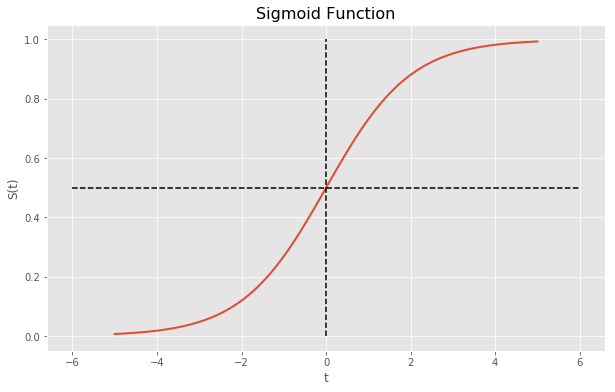

In [9]:
## Plot a sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-5, 5, 100), 1 / ( 1 + np.exp(np.linspace(5, -5, 100))), lw=2)
## Plot a horizontal dashed line
plt.plot([-6, 6], [0.5, 0.5], ls='--', c='k')
## Plot a vertcal dashed line
plt.plot([0, 0], [0, 1], ls='--', c='k')
plt.xlabel('t', size=12)
plt.ylabel('S(t)', size=12)
plt.title('Sigmoid Function', size=16)
plt.show()

**Logistic Regression**

Logistic regression, despite its name, is a linear model for classification rather than regression.

- Idea: if we transform the values of the linear function $\beta_0+\beta_1X$ using the Sigmoid function $S(t)$, then no matter what values $\beta_0$, $\beta_1$ or $X$ take, the transformed $y$ will always have values between 0 and 1.

- *Logistic Regression* models use the following equation to estimate the probability that $y = 1$ given its size $X$:

$$
Pr(Y=1|X=x)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}
$$

- Let us use the likelihood function notation,  $p(x_i,\beta_0,\beta_1)=Pr(Y=1|X=x_i)$, 
to represent the probablity of those observed outcomes to be 1 conditioning on $X=x_i$.

Then, given an input X with n independent observations, the following likelihood gives the probability of having the prescribed labels:

$$L(\beta_0, \beta_1) = \prod_{i, y_i=1}p(x_i, \beta_0, \beta_1)\prod_{i, y_i=0}(1-p(x_i, \beta_0, \beta_1))$$


, where the first product is the probability of successfully predicting the “1”s and the second product is the probability of successfully predicting the “0”s in the data.

- The likelihood function $L(\beta_0, \beta_1)$ gives the probability of observing the prescribed classification outcome.

- Among all the possible $\beta_0$, $\beta_1$, it is natural to pick $\beta_0$ and $\beta_1$ maximizing the likelihood $L(\beta_0, \beta_1)$, i.e., to maximize the “agreement” of the selected model with the observed data.


In practice it is often more convenient to work with the logarithm of the likelihood function, called the **log-likelihood**:

$$
\begin{align}
\log{L(\beta_0,\beta_1)} &= \sum_{i=1}^{n}\{y_i\log{p(x_i,\beta_0,\beta_1)+(1-y_i)\log(1-p(x_i,\beta_0,\beta_1))}\}
\\
&= \sum_{i=1}^{n}\{y_i(\beta_0+\beta_1X)-\log(1+e^{\beta_0+\beta_1X})\}
\end{align}
$$

Logistic regression models are usually fitted by maximum (log) likelihood, i.e., to find $\beta_0$ and $\beta_1$ that maximize the function above. 

- Notice that the class labels $y_i$ pair with $\beta_0+\beta_1X$ naturally in the above expression, one thing we would notice in learning SVM, the support vector machine, later.

**Classification Based on Probability**

After estimating the parameters, the likelihood function $p(x,\beta_0,\beta_1)$ expresses the probability of output $Y=1$ given x. If we set a threshold on the probability, then we can predict binary output.

Let's use tumor size to determine malignancy:

  - If the maximum likelihood gives $Pr(Y=1|X=x) = 0.2$, then our prediction is $20\%$ chance of tumor being malignant, or equivalently, $80\%$ chance it's benign.
  - If we set the threshold, for example, to be 0.5, then we predict the tumor to be benign.


<p><a name="logistic-sklearn"></a></p>

## Logistic Regression in Scikit-Learn

In [10]:
### We first load the modules and data

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
path_to_file = "./data/tumor.csv"
data = pd.read_csv(path_to_file)
x_tm = data[["Size"]]
y_tm = data["Malignant"]
x_tm2 = np.copy(x_tm)
x_tm2[-3, 0] = 13
x_tm2[-1, 0] = 14

- The implementation of logistic regression in scikit-learn can be accessed from class **`LogisticRegression`**.

In [11]:
from sklearn import linear_model
logit_1 = linear_model.LogisticRegression()

- Once a **`LogisticRegression`** object is created, the dictionary of the default parameters can be viewed with the `get_params()` method.

In [12]:
logit_1.get_params()
# 'penality': 'l2' refers to Ridge regression

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

The objective functions for logistic regression implemented in `sklearn` are:
<img src="./pic/L1.png">
and
<img src="./pic/L2.png">

where
- $w \text{ is the coefficients, which was denoted by } \beta_i \text{ in the class.}$
- $c \text{ is the intercept, which was denoted by } \beta_0 \text{ in the class. We can change the parameter } \\ \text{"fit_intercept" to keep or to remove it.}$
- $C \text{ is the inverse of regularization strength. This is opposite to the  } \alpha \text{ we had used in Ridge and Lasso,}\\ \text{smaller values specify stronger regularization.}$
- Therefore the first objective function is of $L_1$ penalty and the second is of $L_2$.

Text(0.5,1,'per sample log loss')

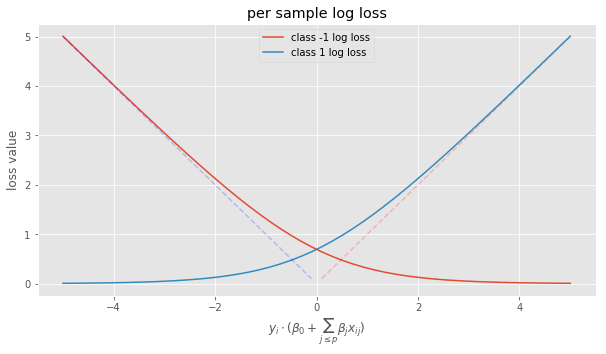

In [13]:
plt.rcParams['figure.figsize'] = (10,5)
t = np.linspace(-5,5,50)
def lossFunc(s):
    return np.log(1+np.exp(-s))
lossFunc = np.vectorize(lossFunc)

plt.plot(t, lossFunc(t), label='class -1 log loss')
t2 = t[t>=0]
plt.plot(t2,t2, 'r--', alpha=0.2)
plt.plot(t, lossFunc(-t), label='class 1 log loss')
t3 = t[t<=0]
plt.plot(t3,-t3, 'b--', alpha=0.2)
plt.legend(loc=9)
plt.xlabel(r'$y_i\cdot (\beta_0 + \sum_{j\leq p}\beta_jx_{ij})$')
plt.ylabel('loss value')
plt.title('per sample log loss')

## Visualization of iris Log Loss Values on Petal Length, Petal Width
- Consider the first 100 samples which are labelled as class $0$ and class $1$, respectively
- We set $\beta_0=0$, $\beta_3=\beta_4=0$ and set $\beta_1$, $\beta_2$ as the free moving slopes
- We sum the per sample log loss into the total log loss

## Imbalanced 2 Classes Subdata of Iris
- There are 50 samples of setosa, 10 samples of versicolor
- It is clear that the log loss function is much steeper on the left

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_samples = 60  
X     = iris.data[:iris_samples,:2]
labels = 2*(iris.target[:iris_samples]-0.5).reshape(-1,1,1)  # change the labels from 0, 1 to -1, 1

def totalLoss(beta1, beta2):  # the regression coefficients beta1, beta2 are 2D arrays 
    beta1 = np.expand_dims(beta1, axis=0)
    beta2 = np.expand_dims(beta2, axis=0)
    X1    = np.expand_dims(np.expand_dims(X[:,0], axis=1), axis=2)
    X2    = np.expand_dims(np.expand_dims(X[:,1], axis=1), axis=2)
    return np.sum(lossFunc(-labels * (beta1 * X1 +beta2 * X2)), axis=0)

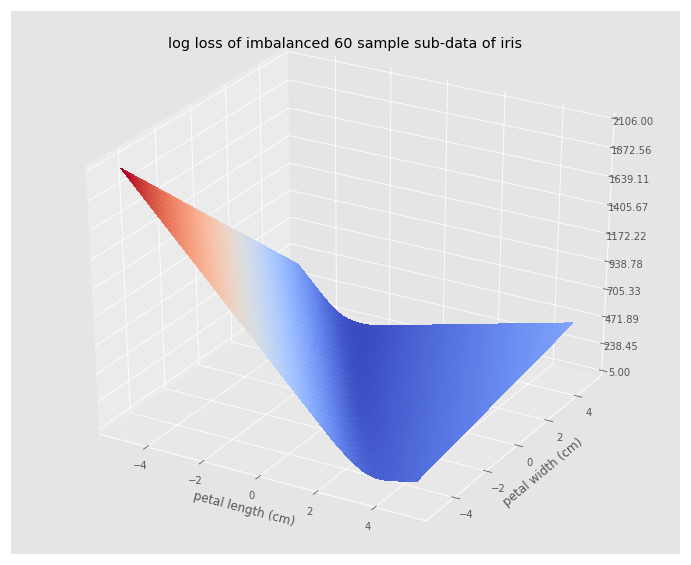

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
beta1 = np.linspace(-5,5,100)
beta2 = np.linspace(-5,5,100)
beta1, beta2 = np.meshgrid(beta1, beta2)
Z = totalLoss(beta1, beta2)


# Plot the surface.
surf = ax.plot_surface(beta1, beta2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.title('log loss of imbalanced 60 sample sub-data of iris')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

## Balanced 2 Class Iris Data
- For a balanced data, the log loss is rather symmetric

In [16]:
iris_samples = 100  
X     = iris.data[:iris_samples,:2]
labels = 2*(iris.target[:iris_samples]-0.5).reshape(-1,1,1)  # change the labels from 0, 1 to -1, 1

def totalLoss(beta1, beta2):  # the regression coefficients beta1, beta2 are 2D arrays 
    beta1 = np.expand_dims(beta1, axis=0)
    beta2 = np.expand_dims(beta2, axis=0)
    X1    = np.expand_dims(np.expand_dims(X[:,0], axis=1), axis=2)
    X2    = np.expand_dims(np.expand_dims(X[:,1], axis=1), axis=2)
    return np.sum(lossFunc(-labels * (beta1 * X1 +beta2 * X2)), axis=0)

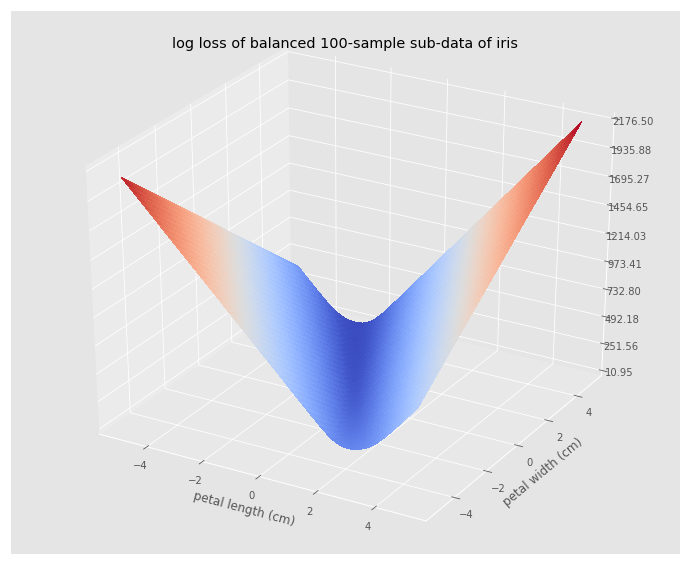

In [17]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
beta1 = np.linspace(-5,5,100)
beta2 = np.linspace(-5,5,100)
beta1, beta2 = np.meshgrid(beta1, beta2)
Z = totalLoss(beta1, beta2)


# Plot the surface.
surf = ax.plot_surface(beta1, beta2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.title('log loss of balanced 100-sample sub-data of iris')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

## The Log Loss Function
- the total **log loss** is the aggregation of per-sample log loss function
- For a given sample (indexed by $i$), the output label $y_i$ can be either $-1$ or $+1$
- The pairing $y_i\cdot (\beta_0 + \sum_{j\leq p}\beta_jx_{ij})$ detects whether the linear formula $\beta_0+\sum_{j\leq p}\beta_jx_{ij}$
is of the same sign as $y_i$
- When $y_i$ and $\beta_0+\sum_{j\leq p}\beta_jx_{ij}$ are of the same sign, the per-sample log-loss is extremely small
- Otherwise a large per-sample log loss is produced as a penalty
- The total **log loss function** is the summation over all samples of the per-sample **log loss function**
- Those samples which are inconsistent with the prediction from the linear formula $\beta_0+\sum_{j\leq p}\beta_jx_{ij}$ are 
heavily penalized

We will discuss **regularizations** in greater details. For this lecture we will set the parameter $C$ large, say 10000. In this way the model behaves as if there is **no** regularization, as what we stated in the theory part.

In [18]:
logit_1.set_params(C=1e4)
logit_1.fit(x_tm, y_tm)
print([logit_1.coef_, logit_1.intercept_])

[array([[4.50422378]]), array([-16.67929062])]


- We may evaluate the model with the method `score`. In a classification problem, the score defaults to the accuracy.

In [19]:
print(logit_1.score(x_tm, y_tm))

0.8333333333333334


- Prediction can be made with the `predict` method:

In [20]:
logit_1.predict([[3], [4]])  # the nested list will be converted to 2D np.array automatically

array([0, 1])

- We can access the probability in each class predicted by the logistic regression as well:

In [21]:
logit_1.predict_proba([[3], [4]])

array([[0.9595586 , 0.0404414 ],
       [0.20790427, 0.79209573]])

With the function `logistic_model_1Dplot()` we visualize the probability estimated and the prediction made by the the logistic regression model.

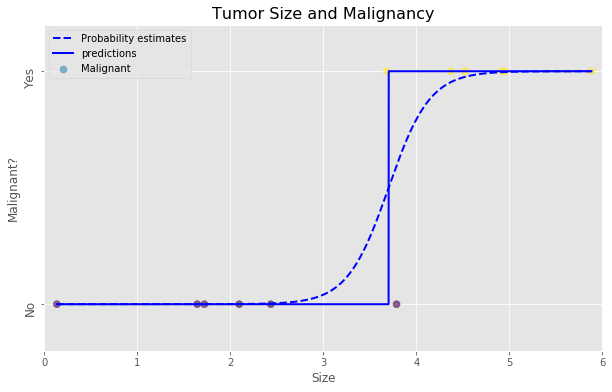

In [22]:
from PlottingFunction import logistic_model_1Dplot

## Plot the data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm.iloc[:,0], y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot logistic model with original dataset
logistic_model_1Dplot(x_tm.iloc[:,0], logit_1)
## Set plot range
plt.axis([0,6,-0.2,1.2])
## Legend top-left corner
plt.legend(loc=2)
plt.show()

- Below we see that the boundary is not affected that much by outliers with logistic regression.

In [23]:
logit_2 = linear_model.LogisticRegression()
logit_2.set_params(C=1e4)
logit_2.fit(x_tm2, y_tm)
print([logit_2.coef_, logit_2.intercept_])

[array([[4.1266289]]), array([-15.28821709])]


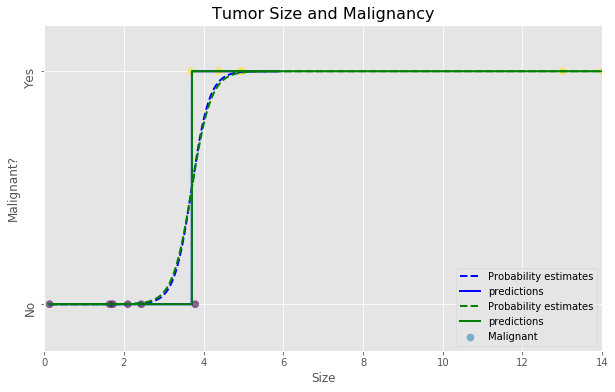

In [24]:
## Plot the data points
plt.figure(figsize=(10, 6))
data_1Dplot(x_tm2, y_tm, \
             xlabel="Size", ylabel="Malignant?", \
             labels=["No", "Yes"], \
             title="Tumor Size and Malignancy")
## Plot logistic model with original dataset
logistic_model_1Dplot(x_tm, logit_1)

## Plot logistic model with outlier
logistic_model_1Dplot(x_tm2, logit_2, c='g')   # set the color to green
## Set plot range
plt.axis([0,14,-.2,1.2])
## Legend bottom-right corner
plt.legend(loc=4)
plt.show()

<p><a name="logistic-multi"></a></p>
### Logistic Regression with Multiple Variables

When mulitple input variables are involved, we just need to include them in the linear function as we did in multiple linear regression

The matrix form can be written as:

$$Pr(Y=1|\mathbf{X})=\frac{e^{\mathbf{X}\beta}}{1+e^{\mathbf{X}\beta}}$$

<p><a name="ex1"></a></p>
#### Example 1

You have historical data from the previous student applicants. For each record, you have the applicant’s two exam scores and the admissions decision. Your task is to build a logistic model that estimates an applicant’s probability of admission based on those two exam scores.

- The code below helps to load the data:

In [25]:
path_to_file = "./data/admission.csv"
data = pd.read_csv(path_to_file)
data.head()

,Decision,Test_1,Test_2
0,1,81.0,85.0
1,0,71.0,85.0
2,1,80.0,90.0
3,0,79.0,84.0
4,0,72.0,94.0


- We then visualize the data set.

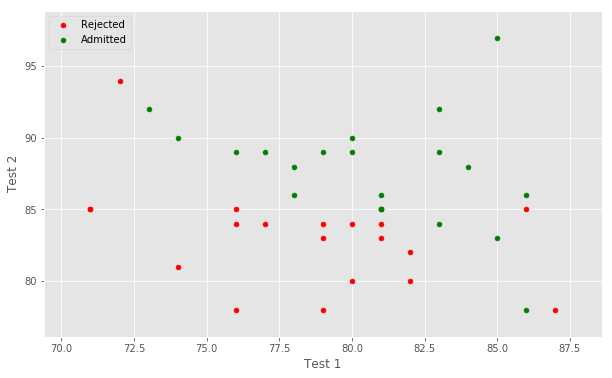

In [26]:
from PlottingFunction import data_2Dplot, logistic_model_2Dplot, plotModel
## Data
scores = data[["Test_1", "Test_2"]]
decision = data["Decision"]
## Plotting
plt.figure(figsize=(10, 6))
data_2Dplot(scores, decision, \
              legends=["Rejected", "Admitted"], \
              xlabel="Test 1", ylabel="Test 2")
plt.show()

Build a logistic regression model **`logit`** with the data.
- What's the score?

In [27]:
## Import linear_model from sklearn if you haven't
## Initialize a LogisticRegression instance with C=10e4
decision_logit = linear_model.LogisticRegression(C=1e4)

#### Your code here

## Fit the model with your data
decision_logit.fit(scores, decision)

## The score (accuracy for classification problems):
decision_logit.score(scores, decision)

0.875

- If you build the model correctly, the code below should sketch the decision boundary for you:

In [28]:
print(decision_logit.intercept_)
print(decision_logit.coef_)

[-81.40161884]
[[0.41017514 0.57132359]]


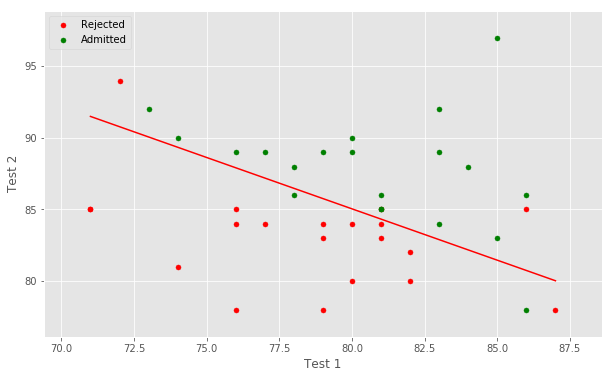

In [29]:
# Plot data points
plt.figure(figsize=(10, 6))
data_2Dplot(scores, decision, \
            legends=["Rejected", "Admitted"], \
            xlabel="Test 1", ylabel="Test 2")

# Plot decision boundary
logistic_model_2Dplot(scores, decision_logit)

plt.show()

In [30]:
set(decision.values)

{0, 1}

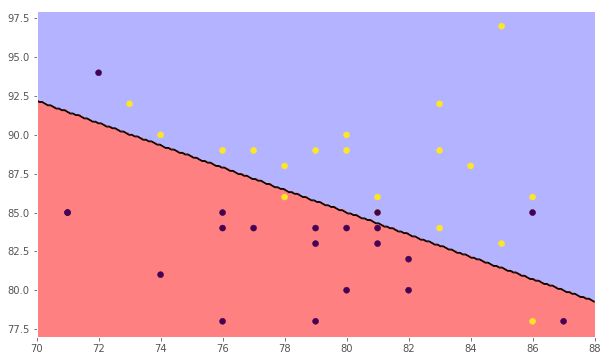

In [31]:
# Alternative visualization
# Plot data points and decision boundary
plt.figure(figsize=(10, 6))

plotModel(
    decision_logit,
    scores.loc[:, 'Test_1'].values.reshape(-1, 1),
    scores.loc[:, 'Test_2'].values.reshape(-1, 1),
    label=decision.values.reshape(-1, 1)
)
plt.show()

Text(0,0.5,'probability')

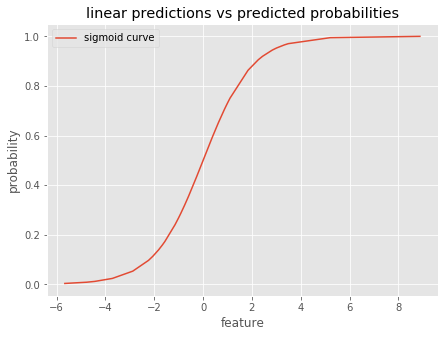

In [32]:
plt.rcParams['figure.figsize'] = (7,5)
values = decision_logit.intercept_+np.sum(decision_logit.coef_.reshape(1,2)*scores, axis=1)
probas = decision_logit.predict_proba(scores)[:,1]
values, probas = zip(*sorted(zip(values, probas)))  # sort the x coordinates monotonically
plt.plot(values, probas, label='sigmoid curve')
plt.legend(loc=2)
plt.title('linear predictions vs predicted probabilities')
plt.xlabel('feature')
plt.ylabel('probability')

<p><a name="classes"></a></p>
### Logistic Regression with More than Two Classes

When the output contains more than two classes, scikit-learn uses a so called “one-vs-rest” setting, 
i.e., separate binary classifiers are trained for all classes.
- Remark: Alternatively, logistic regression can be made into a **multinomial** logistic regression which handles
multi-class classification using **softmax** functions (this approach is the foundation of **neural network classifiers**)


We are going to classify the species of the iris flowers according to their numeric features. Since there are 
three different species, the logistic model will build three classifiers:
- setosa v.s. versicolor & virginica
- versicolor v.s. setosa & virginica
- virginica v.s. setosa & versicolor

We will use only the **3rd and the 4th** features (the petal length and the petal width)

In [33]:
from sklearn import datasets
iris = datasets.load_iris()
pair = (2, 3)

xlabel = iris.feature_names[pair[0]]
ylabel = iris.feature_names[pair[1]]

iris_x = iris.data[:,pair]
iris_y = iris.target

<p><a name="ex2"></a></p>
#### Example 2

- Again we first create and fit the logistic regression:

In [34]:
iris_logit = linear_model.LogisticRegression(C=1e4)
#### Your code here
iris_logit.fit(iris_x, iris_y)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

- Find out the score:

In [35]:
#### Your code here
print(iris_logit.score(iris_x, iris_y))

0.96


- Find out the coefficients:

In [36]:
#### Your code here

## Coefficient
print(iris_logit.coef_)

## Intercept
print(iris_logit.intercept_)

[[-6.05056204 -8.85923128]
 [ 1.5462408  -3.10649957]
 [ 5.62794434 10.30489167]]
[ 21.64116839  -2.85870543 -44.41947288]


Again, if you build the model correctly, the code below should give you the decision boundary. Can you tell which boudary line is predicted by which model?

## Decision Functions for Classifiers
- **sklearn** classifers come with **decision function** method, which encodes the above slopes and intercepts for linear classifiers. 
- The result of the decision function for a multi-class classifier spits out an numpy array of shape $(N, K)$, 
where $K$ is the number of classes and $N$ denotes the number of samples.
- The contour plot of **matplotlib** helps to visualize the level lines of logistic classifier's decision function.

In [37]:
X   = np.linspace(-2,7,100)
Y   = np.linspace(-2,7,100)
X,Y = np.meshgrid(X,Y)
X_features = np.concatenate([X.reshape((-1,1)), Y.reshape((-1,1))],axis=1)
Z   = iris_logit.decision_function(X_features)
Z.shape

(10000, 3)

- Now we use the contour plot to draw the level curves (lines in the case of logistic regression)

Text(0,0.5,'petal width (cm)')

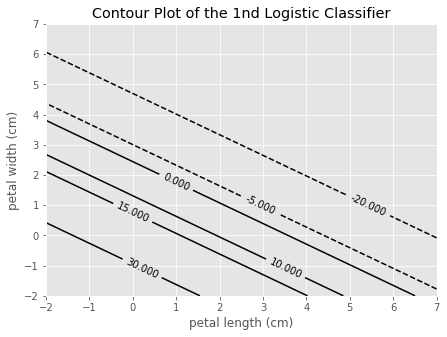

In [38]:
CS = plt.contour(X,Y,Z[:,0].reshape((100,100)), levels=[-20,-5,0,10,15, 30], colors='k')
plt.clabel(CS)
plt.title('Contour Plot of the 1nd Logistic Classifier')
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

Text(0,0.5,'petal width (cm)')

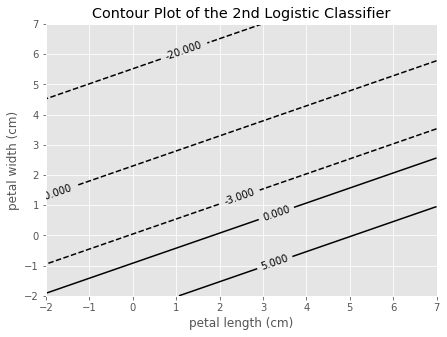

In [39]:
CS = plt.contour(X,Y,Z[:,1].reshape((100,100)), levels=[-20,-10,-3,0,5], colors='k')
plt.clabel(CS)
plt.title('Contour Plot of the 2nd Logistic Classifier')
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

Text(0,0.5,'petal width (cm)')

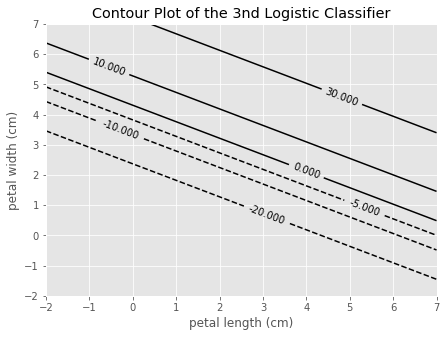

In [40]:
CS = plt.contour(X,Y,Z[:,2].reshape((100,100)), levels=[-20,-10,-5,0,10,30], colors='k')
plt.clabel(CS)
plt.title('Contour Plot of the 3nd Logistic Classifier')
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

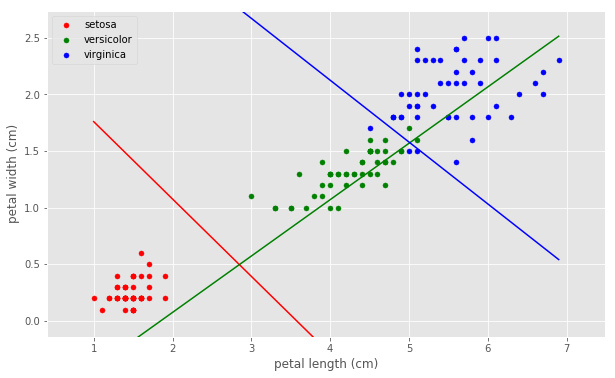

In [41]:
## Plot the data points and the logistic regression classifiers
plt.figure(figsize=(10, 6))
data_2Dplot(iris_x, iris_y, xlabel=xlabel, ylabel=ylabel, legends=iris.target_names)
logistic_model_2Dplot(iris_x, iris_logit)
plt.show()

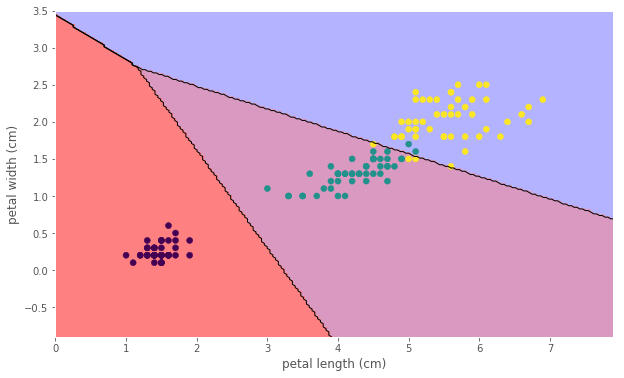

In [42]:
plt.figure(figsize=(10, 6))
plotModel(iris_logit, iris_x[:, 0], iris_x[:, 1], label=iris_y)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

## Visualization of the Class Probabilities Predicted by Logistic Regression

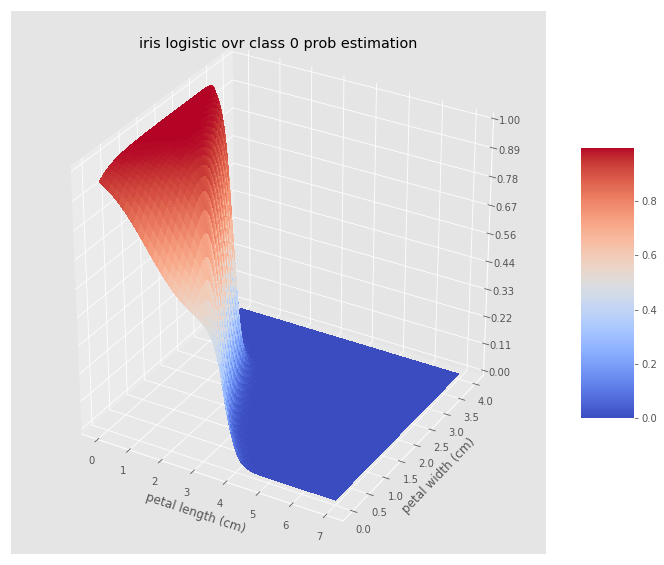

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(0,7,100)
B = np.linspace(0,4,100)
A, B = np.meshgrid(A, B)

C = iris_logit.predict_proba(np.transpose(np.array([A.flatten(), B.flatten()])))[:,0].reshape((100,100))
# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'iris logistic ovr class 0 prob estimation')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

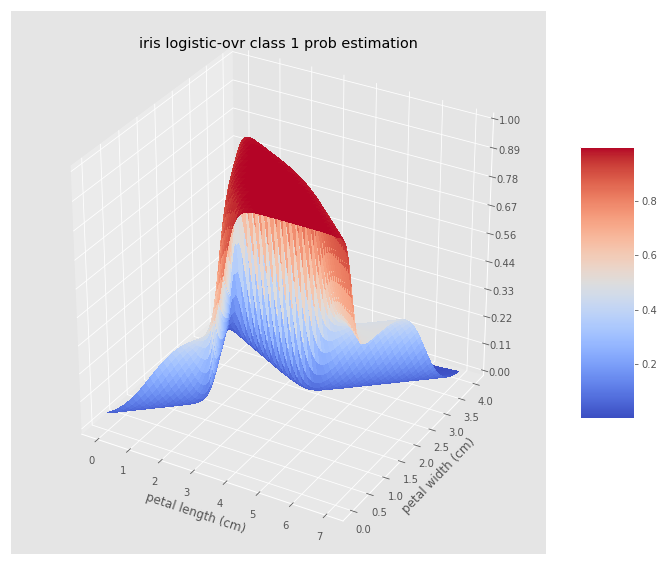

In [44]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(0,7,100)
B = np.linspace(0,4,100)
A, B = np.meshgrid(A, B)

C = iris_logit.predict_proba(np.transpose(np.array([A.flatten(), B.flatten()])))[:,1].reshape((100,100))
# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'iris logistic-ovr class 1 prob estimation')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

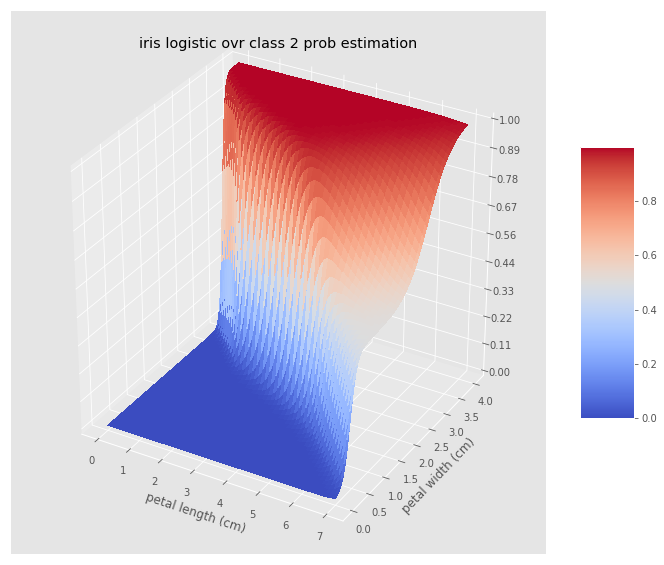

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(0,7,100)
B = np.linspace(0,4,100)
A, B = np.meshgrid(A, B)

C = iris_logit.predict_proba(np.transpose(np.array([A.flatten(), B.flatten()])))[:,2].reshape((100,100))
# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'iris logistic ovr class 2 prob estimation')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

<p><a name="gradient"></a></p>
### Gradient Descent

To maximize the log-likelihood, most packages, including scikit-learn, use a numerical method called **gradient descent** (or its variant), i.e., to find the function maximum by search along a **steepest path** on the graph of log-likelihood function.


<img src="./pic/grad_desc.png" style="height: 450px; width: 600px;">

## Gradient Descent and Stochastic Gradient Descent
- In scikit-learn, the **gradient descent** algorithm is approximately embedded inside **stochastic gradient descent**
- **gradient descent** determines the direction for the next move using the **total loss function**
- **stochastic gradient descent** determine the direction for the next move randomly selecting a sample and use the
gradient of **per-sample loss function** to guide the descent
- In each epoch, a complete set of the sample data is fed into the **sgd** algorithm in a random fashion
- We can ask the **sgd** algorithm to stop shuffling the data if it is necessary 
- Both **gradient descent** and **stochastic gradient descent** introduce the concept of **step-size** (also called 
**learning rate**) which controls the distance to move along the specified gradient direction
- **stochastic gradient descent** implements dynamical adaptive **learning rate** which drops along with the iterations

In [46]:
import warnings
warnings.filterwarnings(action="ignore", module="sklearn", message="^n_iter")
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss

## Important State Attributes of Stochastic Gradient Descent 
- alpha: Penalization constant. scikitlearn **SGD** implements ridge/lasso regularization 
- eta: initial learning_rate
- learning_rate: dynamic learning_rate scheme, default to 'optimal' 
- loss: loss function, default to **SVM** hinge loss
- max_iter: max iterations
- n_iter: number of iterations
- shuffle: boolean flag of randomly shuffling the samples
- tol: tolerance to early stop the iteration if the loss drop is below the tol threshold 
- warm_start: a boolean flag controlling whether starting the iterations using the previous stored solution 

In [47]:
# To study log loss, we switch to loss = 'log'
# To mimic traditional gradient descent, we set shuffle = False
sgd = SGDClassifier(loss='log', shuffle=False)
sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=False, tol=None, verbose=0, warm_start=False)

# Logistic Regression with Gradient Descent 
- In the following we run a logistic regression with gradient descent, using **stochastic gradient descent** with 
**shuffle=False**. Notice that there is still a slight difference from the traditional gradient descent
- We set **warm_start** to True after the initial iteration, to make sure the next iteration makes use of the solution
from the previous run

In [48]:
from copy import deepcopy 
logistic = deepcopy(sgd)

iris           = load_iris()
iris_features  = iris.data
iris_target    = iris.target
logistic.set_params(warm_start=False)
warm_start = False  # turn the warm start off at the beginning
n_samples = 150
steps = range(200,10001,200)
losses_gd = []
scores_gd = []

for step in steps:
        logistic.set_params(warm_start=warm_start, n_iter=step, shuffle=False, verbose=0)
        logistic.fit(iris_features,iris_target)
        scores_gd.append(logistic.score(iris_features,iris_target))
        losses_gd.append(log_loss(iris_target, logistic.predict_proba(iris_features)))
        warm_start = True  # set warm_start to True after the intial iteration

logistic.score(iris_features,iris_target) 

0.9733333333333334

- The log loss shows a monotonic drop as the number of iterations increases
- When the loss function is concave, the **gradient descent** procedure is effective in reducing the **log loss**

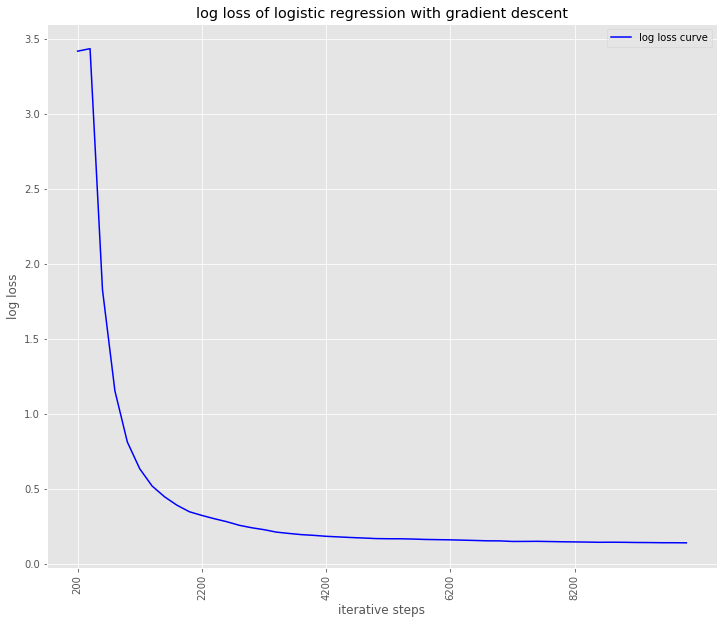

In [49]:
# Each iteration here means each batch of 150 samples 
plt.plot(steps, losses_gd, 'b', label='log loss curve')
plt.title('log loss of logistic regression with gradient descent')
plt.xlabel('iterative steps')
plt.ylabel('log loss')
ticks = plt.xticks(steps[::10], rotation='vertical')
plt.legend(loc=1)

- Next we investigate how does the gradient descent procedure learns the shape of Sigmoid curve
- To make our life simplier, we consider a two-class classification problem
- We take the latter 100 samples of the iris data set

In [50]:
warm_start = False

n_samples = 100
steps = range(100,10200,2000)
losses_gd = []
scores_gd = []
previous_step = 0
coefficients  = []
for step in steps:
        logistic.set_params(warm_start=warm_start, n_iter=step - previous_step)
        logistic.fit(iris_features[50:],iris_target[50:])
        scores_gd.append(logistic.score(iris_features[50:],iris_target[50:]))
        losses_gd.append(log_loss(iris_target[50:], logistic.predict_proba(iris_features[50:])))
        coefficients.append((logistic.intercept_, logistic.coef_))
        warm_start = True  # set warm_start to True after the intial iteration
        previous_step = step
logistic.score(iris_features,iris_target)

0.64

In [51]:
df = None

for idx, (intercept, coef) in enumerate(coefficients):
                 dg = pd.DataFrame({'id':[int(steps[idx]/100)]*100,
                  'linear prediction':intercept+np.sum(iris_features[50:]*coef, axis=1),'target':iris_target[50:]})
                 if df is None: df = dg
                 else: df = pd.concat([df, dg], axis=0)

In [52]:
df['loc'] = pd.cut(df['linear prediction'], 20, labels=False)  # producing bins from the values of linear prediction

In [53]:
dr = df.groupby(['id','loc']).mean()
dr = dr.reset_index().drop('loc',1)

## How Gradient Descent Learns to Fit the S-Shape Curve?
- It is interesting to see that initially (after the first iteration) the S-shape curve is at the wrong position
- Gradually the S-shape curve is positioned at the correct position
- The latter iterations try to fine-tune the behavior where the S-shape curve is sharply increasing
- This is the place where two classes of examples mix together

Text(0,0.5,'average target')

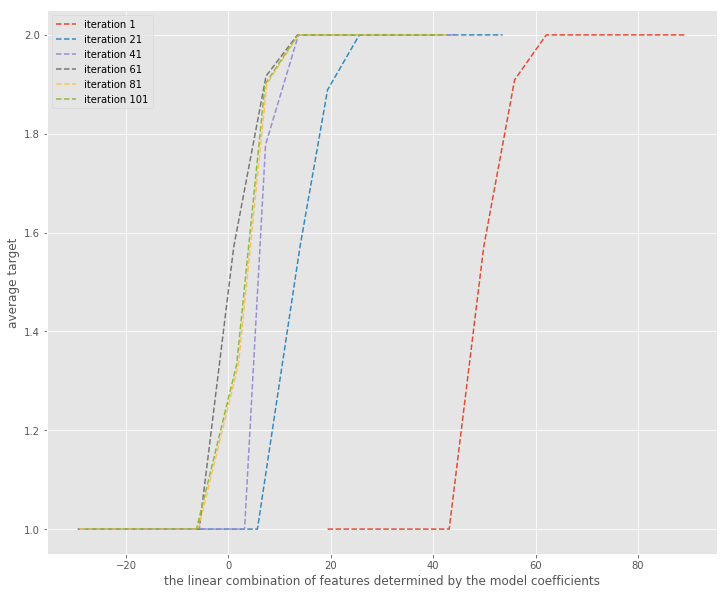

In [54]:
for key, dframe in dr.groupby('id'):  # looping through the different iterations ids
      plt.plot(dframe['linear prediction'], dframe['target'], linestyle='--', label='iteration %d' %(key))
plt.legend(loc=2)
plt.xlabel('the linear combination of features determined by the model coefficients')
plt.ylabel('average target')

- Finally we investigate the behavior of **stochastic gradient descent**
- We turn on **shuffle** to True
- We choose the step size to $15$

In [55]:
from sklearn.preprocessing import scale
scaled_features = scale(iris_features)
warm_start = False
sgd = SGDClassifier(loss='log')
sgd.set_params(learning_rate='constant', eta0=0.1)
sgd_steps = range(1,4502,15) 
losses_sgd = []
scores_sgd = []
previous_step = 0
usePrevious_step = True
for step in sgd_steps:
        sgd.set_params(warm_start=warm_start, n_iter=step - previous_step, shuffle=True, verbose=False)
        sgd.fit(scaled_features,iris_target)
        scores_sgd.append(sgd.score(scaled_features,iris_target))
        losses_sgd.append(log_loss(iris_target, sgd.predict_proba(scaled_features)))
        warm_start = True  # set warm_start to True after the intial iteration
        if usePrevious_step: previous_step = step
sgd.score(scaled_features,iris_target) 

0.9666666666666667

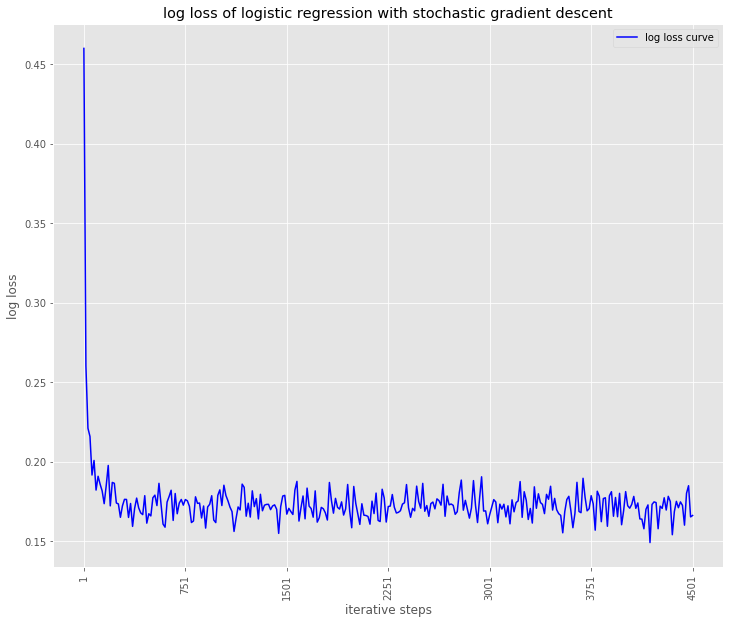

In [56]:
# Each iteration here means each batch of 15 samples 
plt.plot(sgd_steps, losses_sgd, 'b', label='log loss curve')
plt.title('log loss of logistic regression with stochastic gradient descent')
plt.xlabel('iterative steps')
plt.ylabel('log loss')
ticks = plt.xticks(sgd_steps[::50], sgd_steps[::50],rotation='vertical')
plt.legend(loc=1)

## Magnifying the Portion of the Above Graph After the 10th Iteration (15 Sample Each Iteration)
- The plot shows a large oscillation, which is caused by the selections of random samples
- Unlike traditional **gradient descent** which follows a **deterministic** path, the search path of **stochastic 
gradient descent** follows a random walk

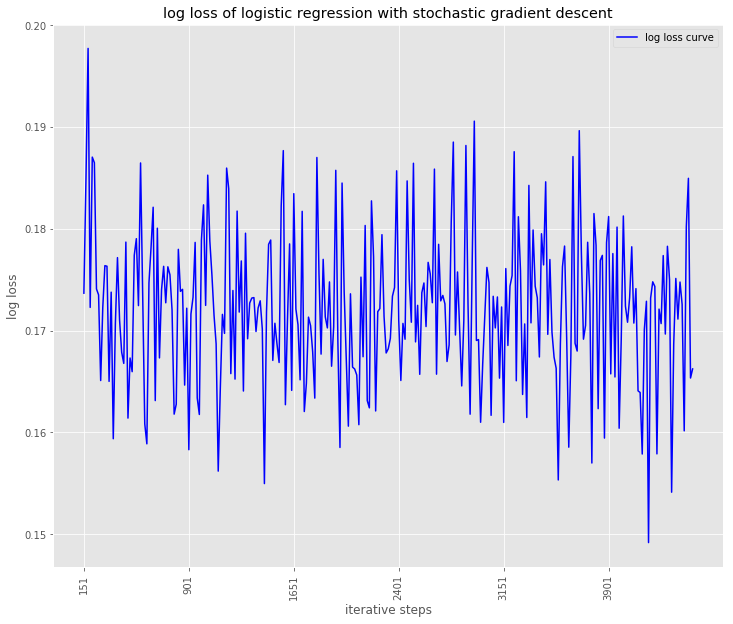

In [57]:
plt.plot(sgd_steps[10:], losses_sgd[10:], 'b', label='log loss curve')
plt.title('log loss of logistic regression with stochastic gradient descent')
plt.xlabel('iterative steps')
plt.ylabel('log loss')
ticks = plt.xticks(sgd_steps[10::50], sgd_steps[10::50],rotation='vertical')
plt.legend(loc=1)

## Verbose 

- Turning on the verbose flag allows **SGD** to print out the intermediate loss scores

In [58]:
sgd.set_params(verbose=2, n_iter=1)
sgd.fit(scaled_features, iris_target)

-- Epoch 1
Norm: 6.10, NNZs: 4, Bias: -5.437904, T: 150, Avg. loss: 0.000680
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.30, NNZs: 4, Bias: -1.089871, T: 150, Avg. loss: 0.508287
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 13.77, NNZs: 4, Bias: -12.348279, T: 150, Avg. loss: 0.045451
Total training time: 0.00 seconds.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=1,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=2, warm_start=True)